In [152]:
# (c) 2014 Reid Johnson
#
# Functions to work with continuous data and linear regression models.

import matplotlib.pyplot as pl

def pairs(data):
    """Generates and shows a pairwise scatterplot of the dataset features.

    A figure with nxn scatterplots is generated, where n is the number of features. The features are
    defined as the all columns excluding the final column, which is defined as the class.

    Args:
      data (array): A dataset.

    """
    i = 1

    # Divide columns into features and class.
    features = list(data.columns)
    classes = features[-1] # create class column
    del features[-1] # delete class column from feature vector

    # Generate an nxn subplot figure, where n is the number of features.
    figure = pl.figure(figsize=(5*(len(data.columns)-1), 4*(len(data.columns)-1)))
    for col1 in data[features]:
        for col2 in data[features]:
            ax = pl.subplot(len(data.columns)-1, len(data.columns)-1, i)
            if col1 == col2:
                ax.text(2.5, 4.5, col1, style='normal', fontsize=20)
                ax.axis([0, 10, 0, 10])
                pl.xticks([]), pl.yticks([])
            else:
                for name in data[classes]:
                    cond = data[classes] == name
                    ax.plot(data[col2][cond], data[col1][cond], linestyle='none', marker='o', label=name)
                #t = plt.title(name)
            i += 1

    pl.show()

In [153]:
import pandas as pd

fileURL = 'http://archive.ics.uci.edu/ml/\
machine-learning-databases/iris/iris.data'
iris = pd.read_csv(fileURL, names=['Sepal Length', 'Sepal Width', \
                                   'Petal Length', 'Petal Width', 
                                   'Species'], header=None)
iris = iris.dropna()

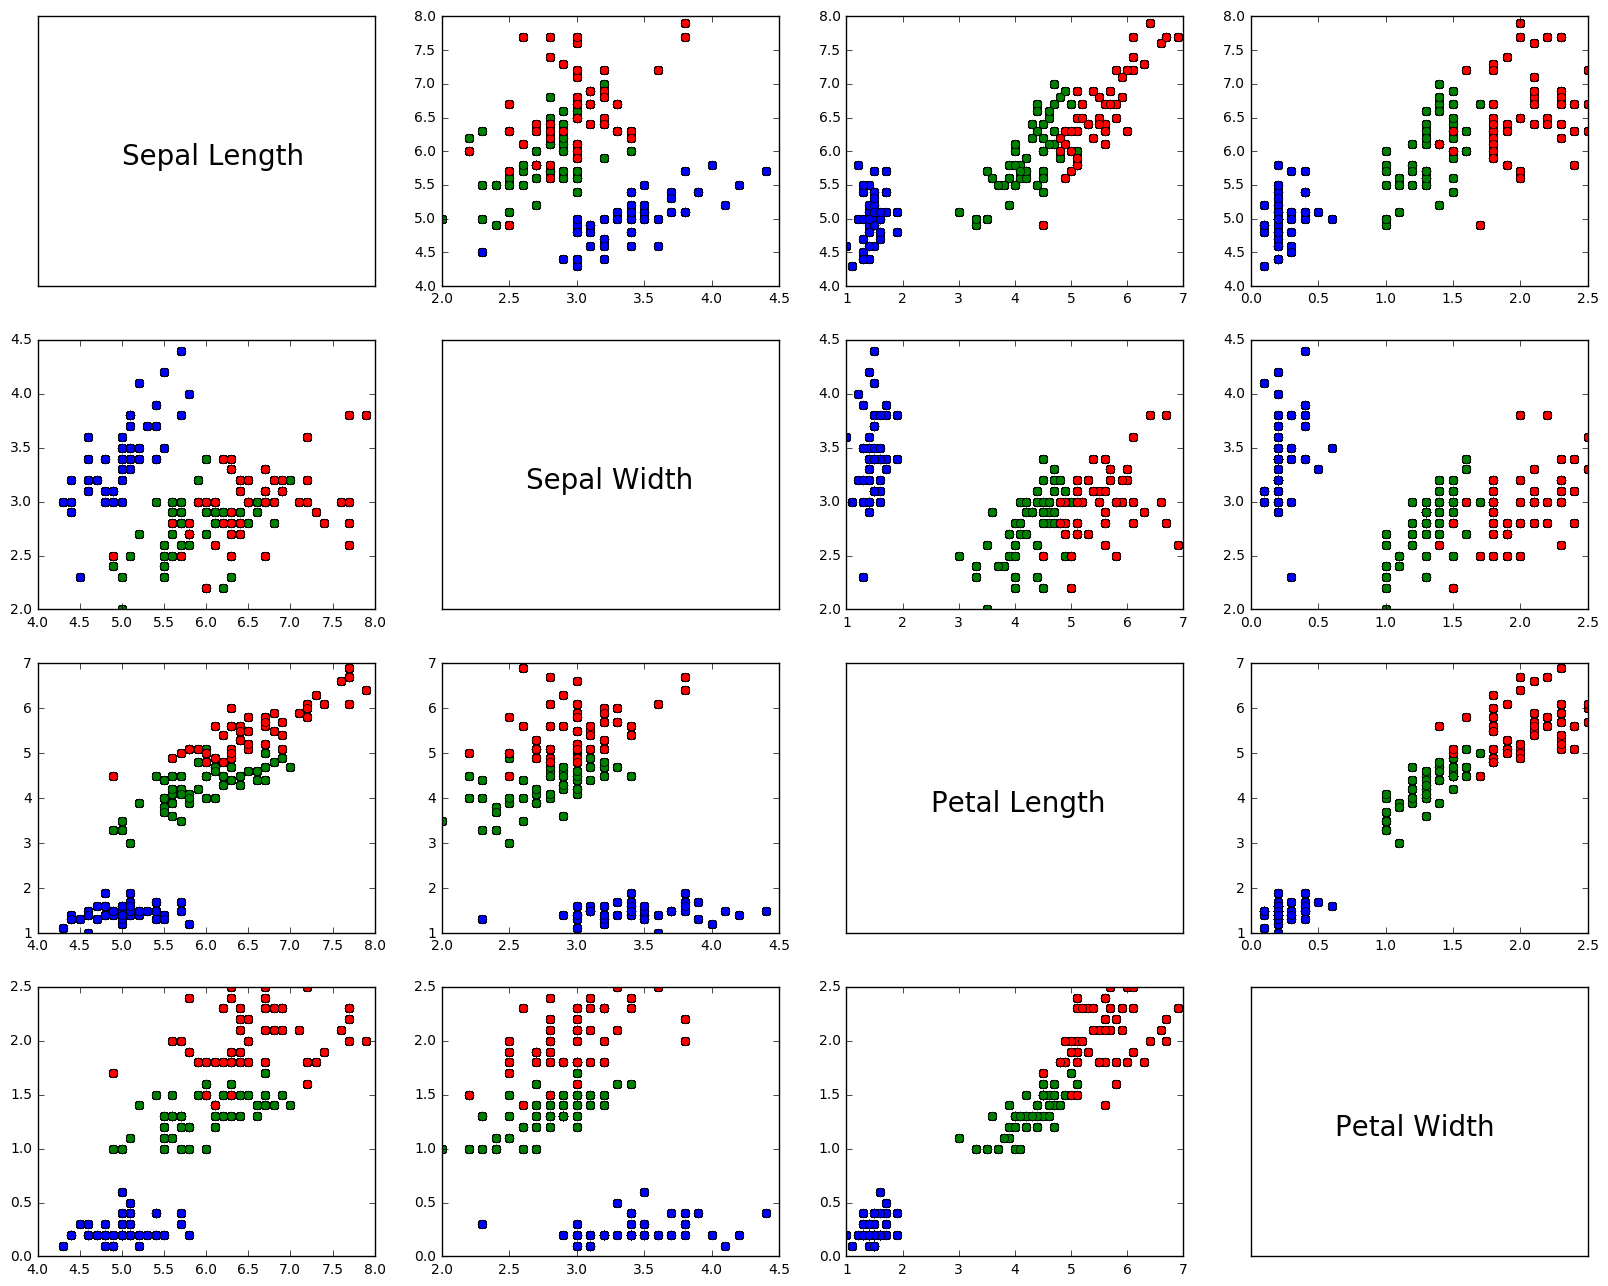

In [154]:
pairs(iris)

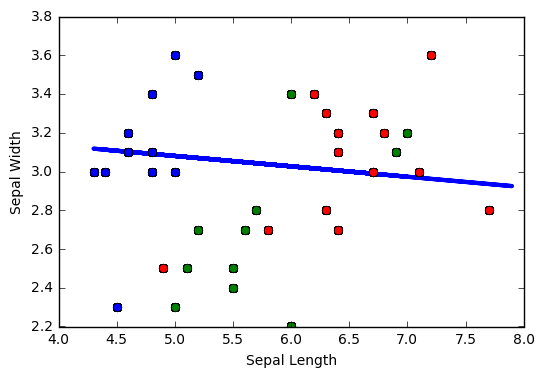

Coefficients: [[-0.05368508]]
Residual sum of squares: 0.22
Variance score: -0.01


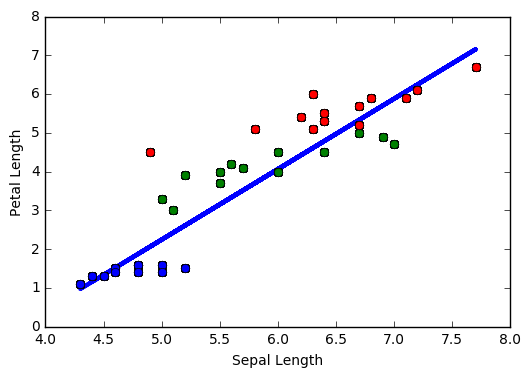

Coefficients: [[ 1.81887891]]
Residual sum of squares: 0.61
Variance score: 0.84


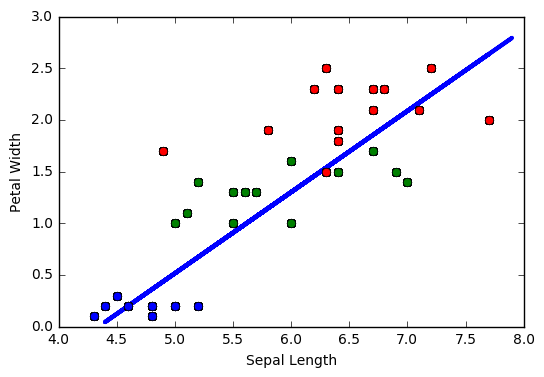

Coefficients: [[ 0.78558415]]
Residual sum of squares: 0.19
Variance score: 0.69


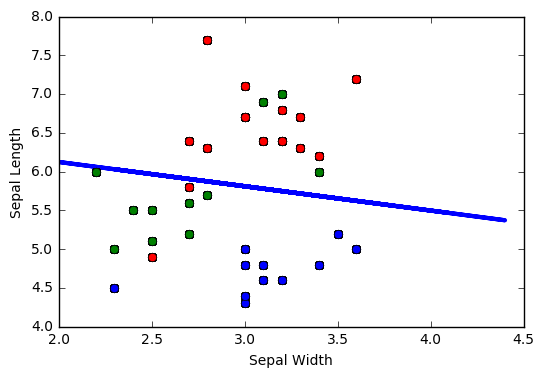

Coefficients: [[-0.31361035]]
Residual sum of squares: 0.82
Variance score: -0.09


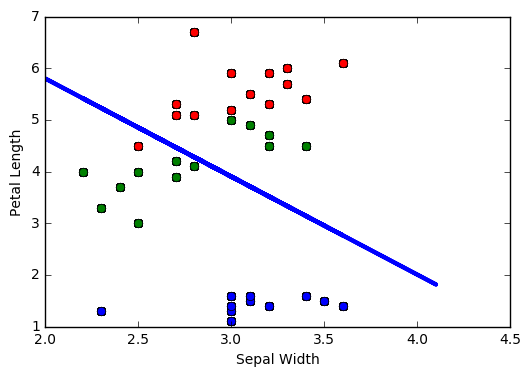

Coefficients: [[-1.89755179]]
Residual sum of squares: 2.30
Variance score: 0.10


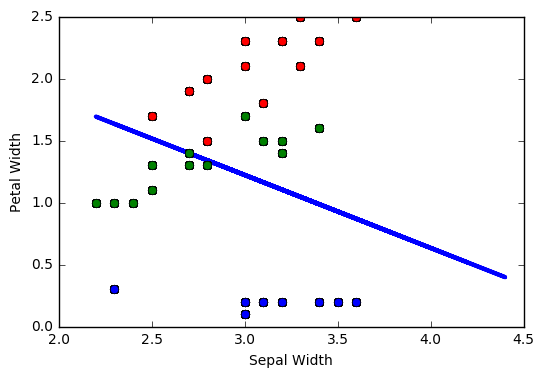

Coefficients: [[-0.58851709]]
Residual sum of squares: 0.58
Variance score: 0.17


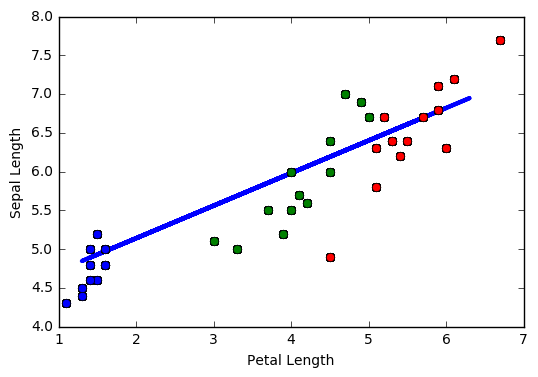

Coefficients: [[ 0.4202122]]
Residual sum of squares: 0.17
Variance score: 0.67


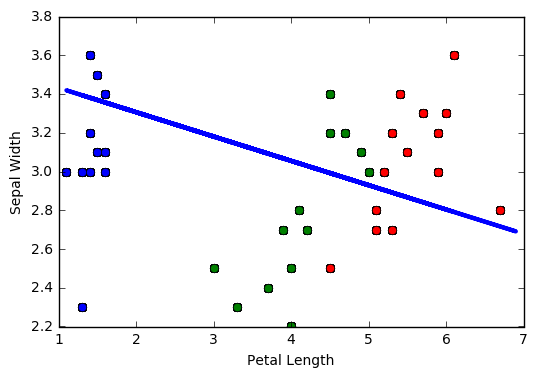

Coefficients: [[-0.12556376]]
Residual sum of squares: 0.19
Variance score: -0.21


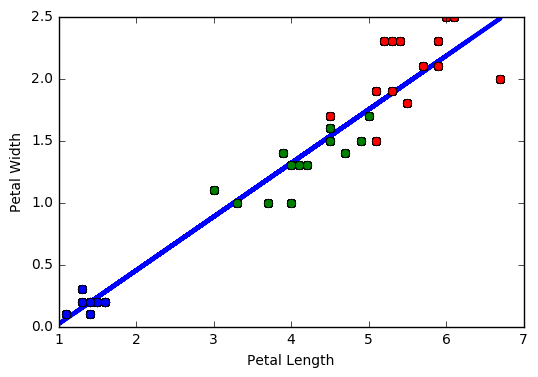

Coefficients: [[ 0.43245647]]
Residual sum of squares: 0.04
Variance score: 0.90


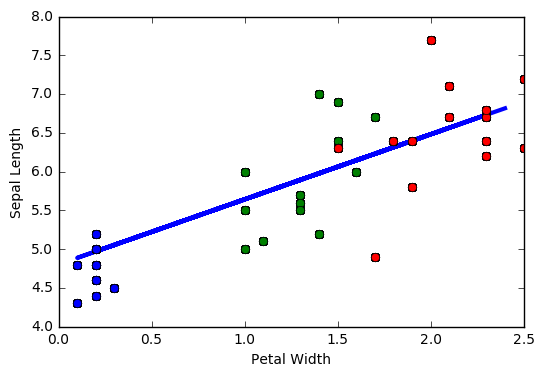

Coefficients: [[ 0.83930818]]
Residual sum of squares: 0.30
Variance score: 0.65


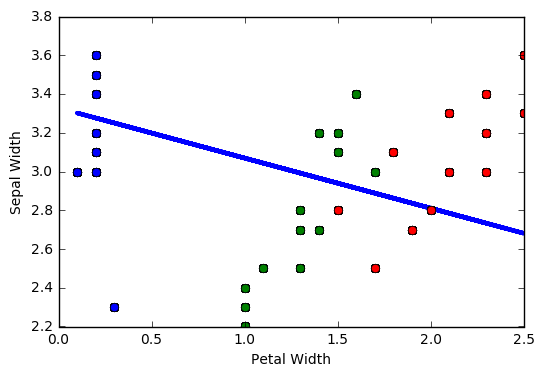

Coefficients: [[-0.25863299]]
Residual sum of squares: 0.20
Variance score: -0.18


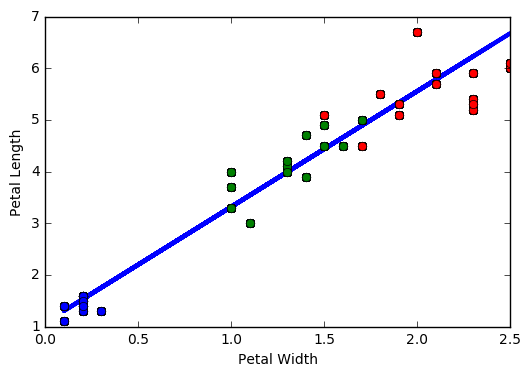

Coefficients: [[ 2.23868869]]
Residual sum of squares: 0.17
Variance score: 0.95


In [155]:
import sklearn.cross_validation
import sklearn.linear_model

features = list(iris.columns)
classes = iris.columns[-1]
del features[-1]

def plot_and_statistics(iris, feature1, feature2):
    train_set, test_set = train_test_split(iris)
    regr = linear_model.LinearRegression()
    x_train  = train_set.ix[:, feature1]
    y_train  = train_set.ix[:, feature2]
    x_test  = test_set.ix[:, feature1]
    y_test  = test_set.ix[:, feature2]
        
    regr.fit(x_train ,y_train)
    pl.plot(x_test, regr.predict(x_test), color='blue',linewidth=3)
    for name in iris[classes]:
        cond = iris[classes] == name
        pl.plot(test[features[feature1[0]]][cond], test[features[feature2[0]]][cond], linestyle='none', marker='o', label=name)
                
    # Plot outputs
    plt.xlabel(features[feature1[0]])
    plt.ylabel(features[feature2[0]])

    pl.show()
    
     # The coefficients
    print('Coefficients:', regr.coef_)
    # The mean squared error
    print("Residual sum of squares: %.2f"
          % np.mean((regr.predict(x_test) - y_test) ** 2))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(x_test, y_test))
    
for m in range(4):
    for n in range(4):
         if(m != n):
            plot_and_statistics(iris,(m,), (n,))

# Conceptional Question:
1. Based on the linear models, “Petal Width” and “Petal Length” pair appear to be most predictive for one another.  As we can see that this pair has the largest variance which is close to 1 and least square Mean Square Error. The variance showed that this pair describes the majority of the variabilities within the dataset. 

2. Removing Petal Width feature would not have a significant affect on the classification performance. Since the feature that is the best to predict based on other features is the closest feature that can be described to the whole performance. And petal width features information can be collected from other three features after some manipulation. 